# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Nguyễn Quốc Huy
- MSSV: 21127511
- Lớp: 21CLC02

# Import

In [37]:
import pandas as pd
import numpy as np

# Import thêm dữ thư viện nếu cần                               
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu

In [38]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa các đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa các đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần
X_train_a = train.iloc[:, :11].to_numpy()    # Dataframe (chứa các đặc trưng huấn luyện)  
X_test_a = test.iloc[:, :11].to_numpy()      # Dataframe (chứa các đặc trưng kiểm tra)


# 1b
X_train_1b = train.loc[:, ['conscientiousness', 'agreeableness', 'extraversion', 'openess_to_experience', 'nueroticism']]
y_train_1b = train.iloc[:, -1]

models_train = [X_train.loc[:, 'conscientiousness'].to_numpy().reshape(-1, 1), X_train_1b.loc[:, 'agreeableness'].to_numpy().reshape(-1, 1), X_train_1b.loc[:, 'extraversion'].to_numpy().reshape(-1, 1), X_train_1b.loc[:, 'openess_to_experience'].to_numpy().reshape(-1, 1), X_train_1b.loc[:, 'nueroticism'].to_numpy().reshape(-1, 1)]
models_test = [X_test.loc[:, 'conscientiousness'].to_numpy().reshape(-1, 1), X_test.loc[:, 'agreeableness'].to_numpy().reshape(-1, 1), X_test.loc[:, 'extraversion'].to_numpy().reshape(-1, 1), X_test.loc[:, 'openess_to_experience'].to_numpy().reshape(-1, 1), X_test.loc[:, 'nueroticism'].to_numpy().reshape(-1, 1)]

# 1c
X_train_1c = train.loc[:, ['English', 'Logical', 'Quant']]
y_train_1c = train.iloc[:, -1]

models_train_c = [X_train.loc[:, 'English'].to_numpy().reshape(-1, 1), X_train_1c.loc[:, 'Logical'].to_numpy().reshape(-1, 1), X_train_1c.loc[:, 'Quant'].to_numpy().reshape(-1, 1)]
models_test_c = [X_test.loc[:, 'English'].to_numpy().reshape(-1, 1), X_test.loc[:, 'Logical'].to_numpy().reshape(-1, 1), X_test.loc[:, 'Quant'].to_numpy().reshape(-1, 1)]



# Cài đặt hàm

In [39]:
# Cài đặt các hàm cần thiết ở đây

class OLSLinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y

        return self


    def get_params(self):
        return self.w


    def predict(self, X):
        return np.sum(self.w.ravel() * X, axis=1)

def mae(y, y_hat):
    return np.mean(np.abs(y.ravel() - y_hat.ravel()))


# Define a custom KFold function
def custom_kfold(num_splits, data_length):
    indices = np.arange(data_length)
    np.random.shuffle(indices)
    fold_size = data_length // num_splits
    for i in range(num_splits):
        val_start = i * fold_size
        val_end = (i + 1) * fold_size
        val_indices = indices[val_start:val_end]
        train_indices = np.concatenate([indices[:val_start], indices[val_end:]])
        yield train_indices, val_indices

# Define a custom cross validation for MAE value
def custom_cross_validation_mae(datalength, x, y, k_fold = 10):
    mae_sum = 0;
    for train_idx, val_idx in custom_kfold(k_fold, datalength):
        X_train_fold, X_val_fold = x[train_idx], x[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]

        lr = OLSLinearRegression().fit(X_train_fold, y_train_fold)
        y_val_pred = lr.predict(X_val_fold)
        mae_fold = mae(y_val_fold, y_val_pred)
        mae_sum += mae_fold
    
    return mae_sum

def custom_cross_validation_model(models, X, y, num_splits = 10):
    mae_values = []
    for model in models:
        mae_sum = 0
        for train_idx, val_idx in custom_kfold(num_splits, len(X)):
            X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
            y_train_fold, y_val_fold = y[train_idx], y[val_idx]

            lr = OLSLinearRegression().fit(X_train_fold, y_train_fold)
            y_val_pred = lr.predict(X_val_fold)
            mae_fold = mae(y_val_fold, y_val_pred)
            mae_sum += mae_fold

        average_mae = mae_sum / num_splits
        mae_values.append(average_mae)
    return mae_values



# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm) 

In [40]:
# Phần code cho yêu cầu 1a

linearRegression = OLSLinearRegression().fit(X_train_a, y_train)
y_test_predict = linearRegression.predict(X_test_a)
w = linearRegression.get_params()

print('w values----------------')
w_reshape = w.reshape(-1, 1)
for i, weight in enumerate(w_reshape, start=1):
    print(f"w{i}: {weight[0]:.3f}")


w values----------------
w1: -22756.513
w2: 804.503
w3: 1294.655
w4: -91781.898
w5: 23182.389
w6: 1437.549
w7: -8570.662
w8: 147.858
w9: 152.888
w10: 117.222
w11: 34552.286


In [41]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
Res_MAE = mae(y_test, y_test_predict)
print('MAE:', Res_MAE)

MAE: 104863.77754033018


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -22756.513 * Gender + 804.503 * 10percentage \\ + 1294.655 * 12percentage - 91781.898 * CollegeTier \\ + 23182.389 * Degree + 1437.549 * collegeGPA \\ - 8570.662 * CollegeCityTier + 147.858 * English \\ + 152.888 * Logical + 117.222 * Quant + 34552.286 * Domain$$

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [42]:
# Phần code cho yêu cầu 1b
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

num_splits = 10
average_maes = []

average_maes = [
    sum(custom_cross_validation_mae(len(X_train_1b), model, y_train_1b, num_splits) for _ in range(num_splits)) / num_splits
    for model in models_train
]


best_model_index = np.argmin(average_maes)
best_feature = models_train[best_model_index]

df = pd.DataFrame(list(zip(X_train_1b.columns.to_numpy().flatten(), average_maes)), columns=['Mô hình với 1 đặc trưng', 'MAE'])
print(df)
print("Best feature:", X_train_1b.columns[best_model_index])
print("Best MAE:", average_maes[best_model_index])

  Mô hình với 1 đặc trưng           MAE
0       conscientiousness  3.062816e+06
1           agreeableness  3.007685e+06
2            extraversion  3.070333e+06
3   openess_to_experience  3.028105e+06
4             nueroticism  2.992336e+06
Best feature: nueroticism
Best MAE: 2992336.1395458668


In [43]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

best_personality_feature_model = OLSLinearRegression().fit(models_train[best_model_index], y_train_1b)
X_test_best_feature = models_test[best_model_index]
y_predict_b = best_personality_feature_model.predict(X_test_best_feature)

w = best_personality_feature_model.get_params()
rounded_w_str = f'w: {w[0]:.3f}'
print(rounded_w_str)

w: -56546.304


In [44]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model

print("MAE: ", mae(y_test, y_predict_b))


MAE:  291019.693226953


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -56546.304 * nueroticism$$

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [45]:
# Phần code cho yêu cầu 1c
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

num_splits = 10
average_maes = []

average_maes = [
    sum(custom_cross_validation_mae(len(X_train_1c), model, y_train_1b, num_splits) for _ in range(num_splits)) / num_splits
    for model in models_train_c
]


best_model_index = np.argmin(average_maes)
best_feature = models_train_c[best_model_index]

df = pd.DataFrame(list(zip(X_train_1c.columns.to_numpy().flatten(), average_maes)), columns=['Mô hình với 1 đặc trưng', 'MAE'])
print(df)
print("Best feature:", X_train_1c.columns[best_model_index])
print("Best MAE:", average_maes[best_model_index])

  Mô hình với 1 đặc trưng           MAE
0                 English  1.219811e+06
1                 Logical  1.203527e+06
2                   Quant  1.181117e+06
Best feature: Quant
Best MAE: 1181116.809889007


In [46]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

best_skill_feature_model = OLSLinearRegression().fit(models_train_c[best_model_index], y_train_1c)
# Dự đoán trên tập kiểm tra sử dụng đặc trưng tốt nhất đã chọn
X_test_best_feature = models_test_c[best_model_index]
y_predict_c = best_skill_feature_model.predict(X_test_best_feature)

w = best_skill_feature_model.get_params()
rounded_w_str = f'w: {w[0]:.3f}'
print(rounded_w_str)

w: 585.895


In [47]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model

print("MAE: ", mae(y_test, y_predict_c))

MAE:  106819.57761989674


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 585.895 * Quant$$

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

In [48]:
# Trình bày các phần tìm ra mô hình

## Hướng giải quyết và tìm mô hình: 
- Ta cần tìm ra hệ số tương quan giữa Salary và các thuộc tính đặc trưng trong tập dữ liệu train 
- Sau đó, nhờ các hệ số tương quan, ta sẽ quyết định các đặc trưng cần thiết cho mô hình. Nếu hệ số tương quan từ 0 đến 1, ta có thể kết luận thuộc tính đó tương quan thuận với Salary, nghĩa là nếu thuộc tính đó tăng thì Salary cũng tăng, và ngược lại. 
- Bằng cách này, ta có thể suy ra 3 mô hình tùy thuộc vào 3 hệ số tương quan tối thiểu mà chúng ta muốn nhận, ở đây, em sẽ có 3 hệ số tối thiểu tương ứng với 3 mô hình là 0.15, 0.1 và 0.
- Ta có thể bao quát hơn các đặc trưng của mô hình bằng việc bổ sung thêm các đặc trưng nào có nhiều điểm ngoại lai (Outliers), nếu một đặc trưng có nhiều điểm ngoại lai so với biểu đồ tổng quát, ta cũng có thể thêm đặc trưng đó vào mô hình cần tìm, vì càng nhiều điểm ngoại lai, càng ảnh hưởng đến kết quả chung của giá trị Salary.
- Mục tiêu của mô hình cần có: 
* Có được MAE thấp nhất so với các mô hình đã làm
* Các đặc trưng không cần thiết (Gender, ...) không nên xuất hiên trong mô hình

In [49]:
# Tính toán ma trận tương quan và sắp xếp giảm dần
correlation = train.corr().iloc[:, -1]

# Tạo DataFrame từ dữ liệu ma trận tương quan
correlation_df = pd.DataFrame(
    index = correlation.index,
    data = correlation.values,
    columns=['Correlation']
)

print(correlation_df.sort_values(by= 'Correlation', ascending= False))

                       Correlation
Salary                    1.000000
Quant                     0.205358
Logical                   0.188416
English                   0.169293
10percentage              0.155174
12percentage              0.149531
ComputerProgramming       0.125866
collegeGPA                0.122469
Domain                    0.122022
agreeableness             0.068623
MechanicalEngg            0.028854
CivilEngg                 0.016150
CollegeCityTier           0.004575
extraversion             -0.002661
openess_to_experience    -0.007814
ElectronicsAndSemicon    -0.009292
Degree                   -0.017602
 Gender                  -0.036183
TelecomEngg              -0.040415
ElectricalEngg           -0.041217
conscientiousness        -0.057699
nueroticism              -0.073401
ComputerScience          -0.095507
CollegeTier              -0.174824


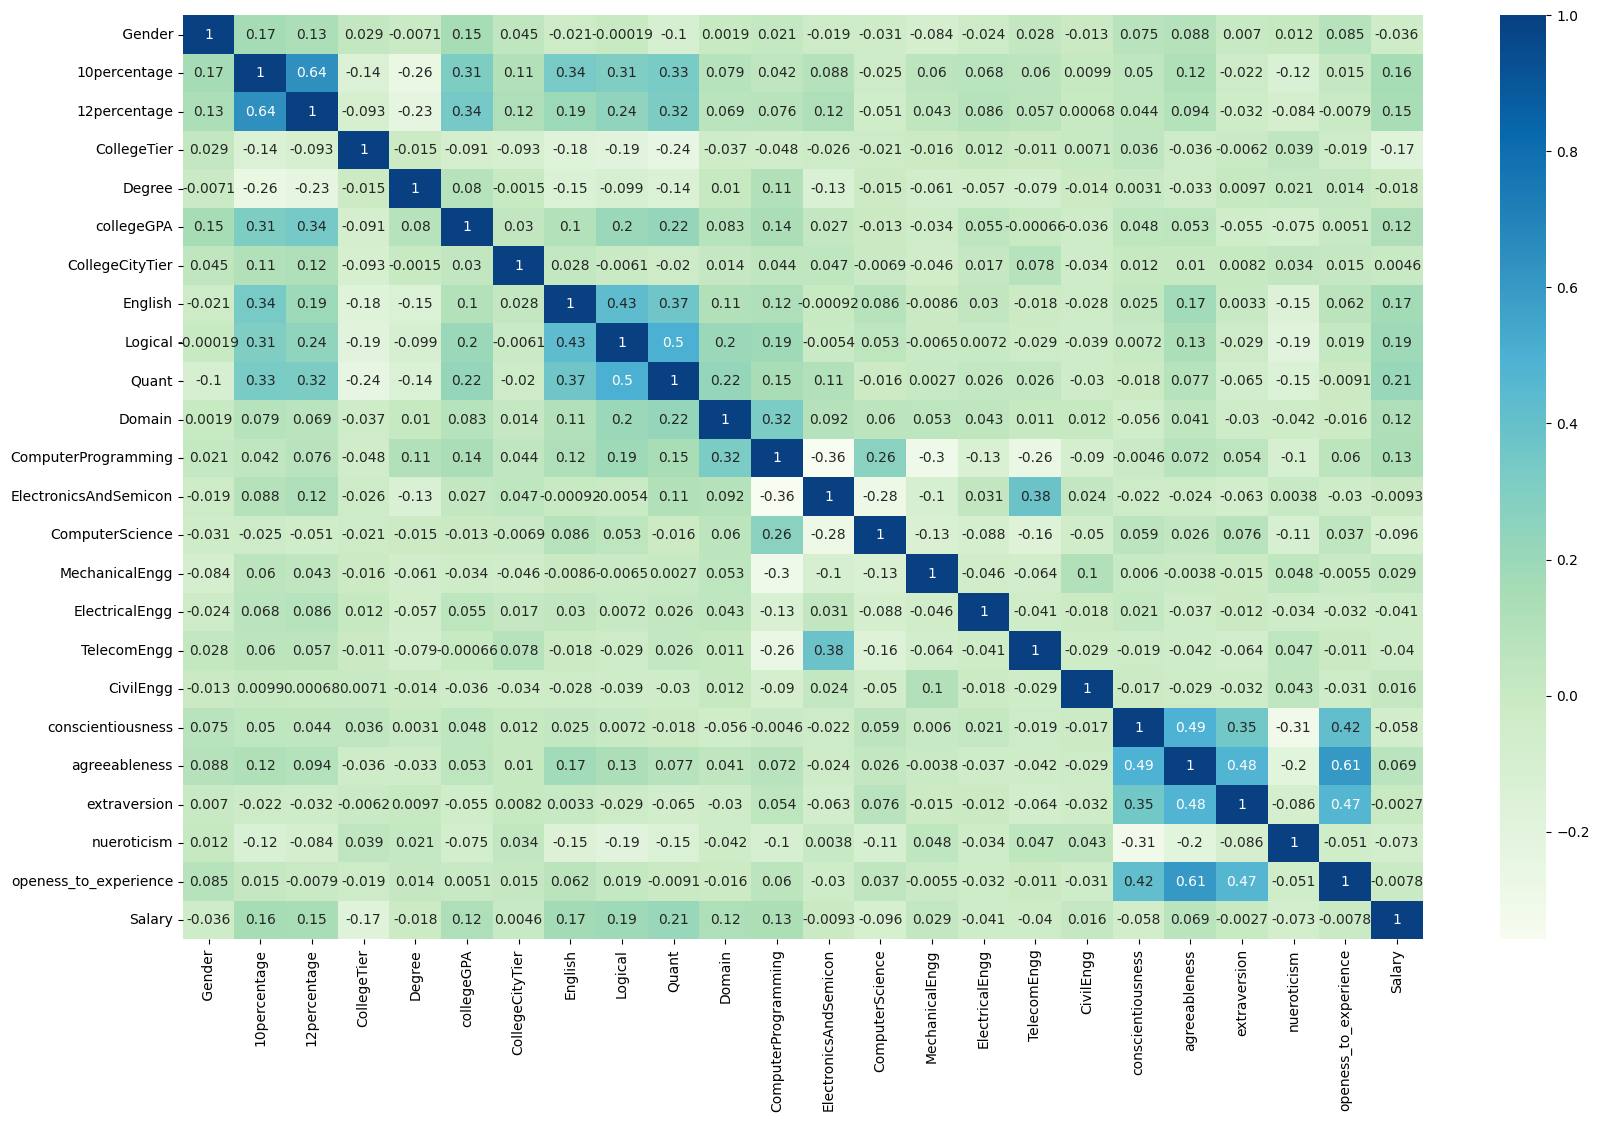

In [50]:
plt.figure(figsize=(20,12))
sns.heatmap(train.corr(),annot=True,cmap='GnBu')
plt.show()

In [51]:
def detect_outliers(data):
    outlier_percents = {}
    for column in data.columns:
        if data[column].dtype != object:
            q1 = np.quantile(data[column], 0.25)
            q3 = np.quantile(data[column], 0.75)
            iqr = q3 - q1
            upper_bound = q3 + (1.5 * iqr)
            lower_bound = q1 - (1.5 * iqr)
            outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)][column]
            outlier_percentage = len(outliers) / len(data[column]) * 100
            outlier_percents[column] = outlier_percentage
            outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    
    return outlier_dataframe.sort_values(by = 'Outlier_percentage', ascending = False)

detect_outliers(train)

,Outlier_percentage
Gender,24.065836
ComputerScience,23.754448
ComputerProgramming,20.951957
TelecomEngg,9.430605
Degree,7.918149
CollegeTier,7.651246
Domain,6.138790
MechanicalEngg,5.560498
ElectricalEngg,3.870107
Salary,2.580071


## Thử nghiệm, so sánh các mô hình

In [52]:
# Phần code cho yêu cầu 1d
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
# In ra các kết quả cross-validation như yêu cầu


# selected_features = ['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree', 'collegeGPA', 'CollegeCityTier', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

# Tương quan theo Salary

model_1 = ['Quant', 'Logical', 'English', '10percentage','12percentage', 'ComputerProgramming','collegeGPA', 'Domain', 'agreeableness', 'MechanicalEngg', 'CivilEngg', 'CollegeCityTier', 'ComputerScience', 'TelecomEngg', 'Degree', 'CollegeTier']
model_2 = ['Quant', 'Logical', 'English', '10percentage','12percentage', 'ComputerProgramming','collegeGPA', 'Domain', 'ComputerScience', 'TelecomEngg', 'Degree', 'CollegeTier']
model_3 = ['Quant', 'Logical', 'English', '10percentage','12percentage', 'ComputerScience', 'TelecomEngg', 'Degree', 'CollegeTier']

model_1d = [model_1, model_2, model_3]
mae_values = []

models = [model_1, model_2, model_3]

mae_values = custom_cross_validation_model(models, X_train_1b, y_train_1b)

best_index = np.argmin(mae_values) 
best_model = model_1
best_val_pos = 0
best_val = np.inf

for i in range (len(model_1d)):
    print(f'Model {i+1}: {mae_values[i]}')
    if(mae_values[i] < best_val):
        best_val = mae_values[i]
        best_val_pos = i
print(f'Best model: Model {best_val_pos+1}')
print("MAE:", mae_values[best_index])

Model 1: 277562.4885741418
Model 2: 277805.00353324733
Model 3: 277896.5251378541
Best model: Model 1
MAE: 277562.4885741418


In [53]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
                                    
X_train_1d = train.loc[:, model_1d[best_val_pos]].to_numpy()
X_test_1d = test.loc[:, model_1d[best_val_pos]].to_numpy()

my_best_model = OLSLinearRegression().fit(X_train_1d, y_train)
y_test_predict = my_best_model.predict(X_test_1d)
    
w = my_best_model.get_params()

print('w values----------------')
w_reshape = w.reshape(-1, 1)
for i, weight in enumerate(w_reshape, start=1):
    print(f"w{i}: {weight[0]:.3f}")


w values----------------
w1: 119.728
w2: 139.523
w3: 162.418
w4: 730.822
w5: 999.712
w6: 111.115
w7: 1236.523
w8: 22859.617
w9: 5179.526
w10: 75.531
w11: 151.137
w12: -8382.822
w13: -164.440
w14: -69.950
w15: 12696.401
w16: -89370.213


In [54]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model

Res_MAE = mae(y_test, y_test_predict)
print('MAE:', Res_MAE)

MAE: 102563.47987323412


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 119.728 * Quant + 139.523 * Logical \\ + 162.418 * English + 730.822 * 10percentage  \\ + 999.712 * 12percentage + 111.115 * ComputerProgramming  \\ + 1236.523 * collegeGPA + 22859.617 * Domain \\ + 5179.526 * agreeableness + 75.531 * MechanicalEngg  \\ + 151.137 * CivilEngg - 8382.822 * CollegeCityTier \\ - 164.440 * ComputerScience - 69.950 * TelecomEngg \\ + 12696.401 * Degree - 89370.213 * CollegeTier$$